
========== Функция Квадратичная ==========

Функция: Сопряжённые градиенты
Точка минимума: [2.951092822099107e-7, 8.454582804410364e-8]
Кол-во итераций: 2
Время работы: 79 milliseconds

Функция: Полак-Рибьер
Точка минимума: [3.754387721257166e-7, -2.1806935273813667e-7]
Кол-во итераций: 2
Время работы: 49 milliseconds

Функция: Диксон
Точка минимума: [-6.975923980334208e-7, 4.6343843236053614e-7]
Кол-во итераций: 33
Время работы: 53 milliseconds

Функция: Дайяна
Точка минимума: [8.772529604615552e-7, -2.1931375581193485e-7]
Кол-во итераций: 2
Время работы: 52 milliseconds

Функция: Хестенс-Стифель
Точка минимума: [8.772529604615552e-7, -2.1931375581193485e-7]
Кол-во итераций: 2
Время работы: 49 milliseconds


========== Функция Розенброка ==========

Функция: Сопряжённые градиенты
Точка минимума: [0.9997207287698139, 0.999439936290825]
Кол-во итераций: 9
Время работы: 64 milliseconds

Функция: Полак-Рибьер
Точка минимума: [0.9999964926637532, 0.9999929759477961]
Кол-во итераций: 17
Вр

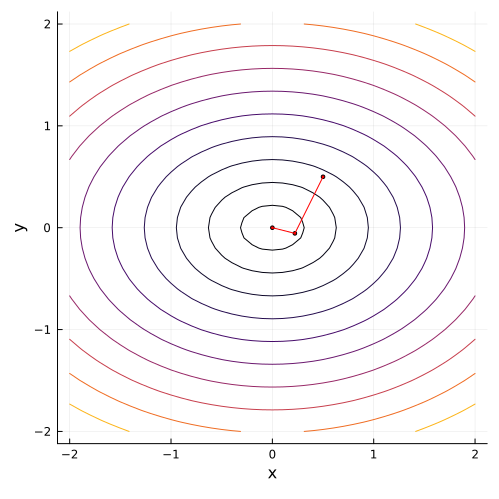

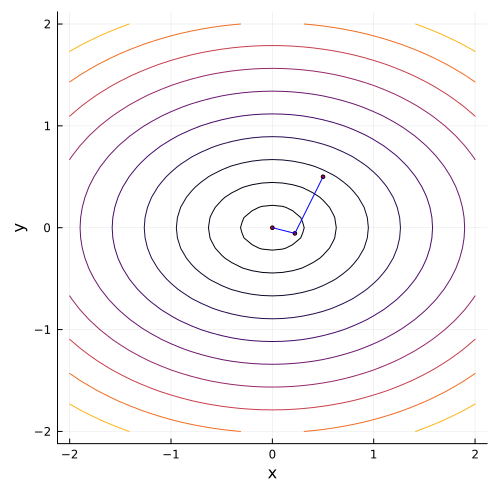

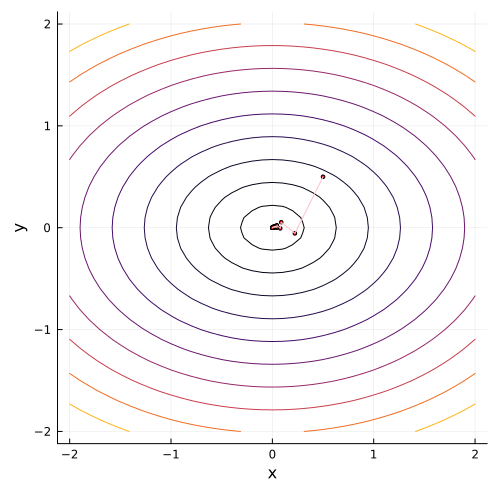

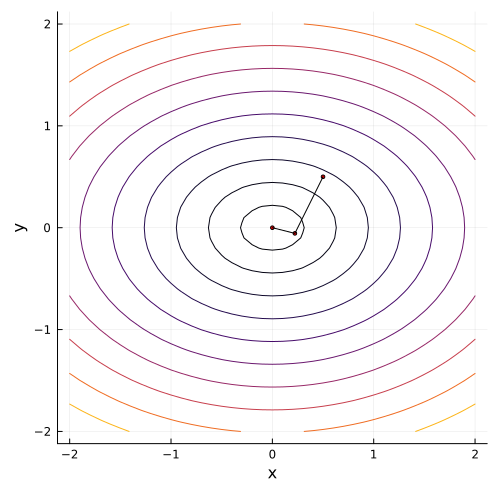

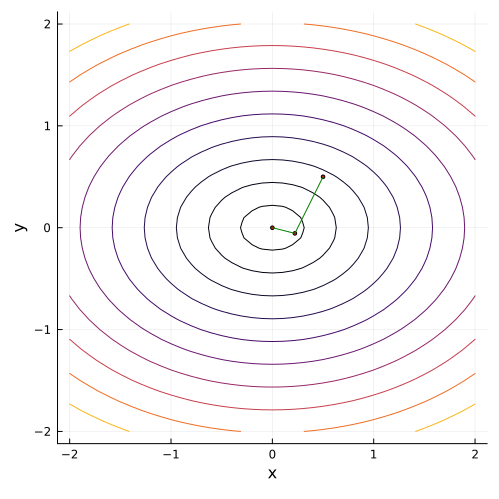

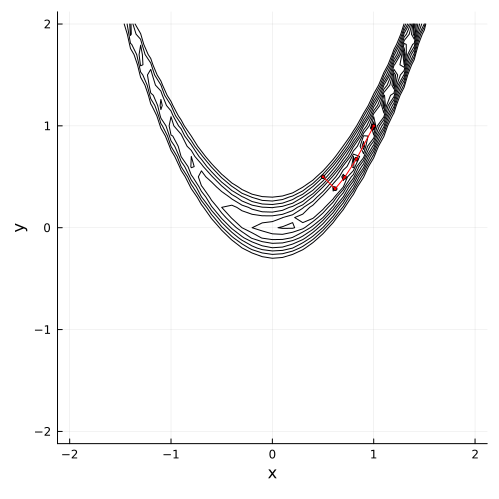

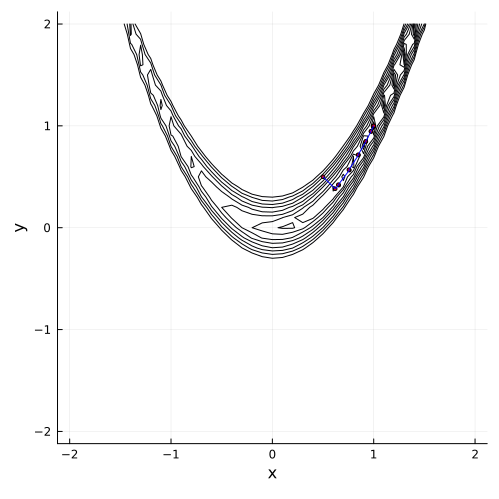

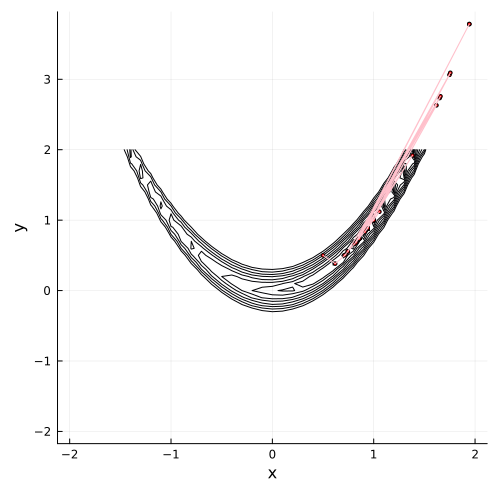

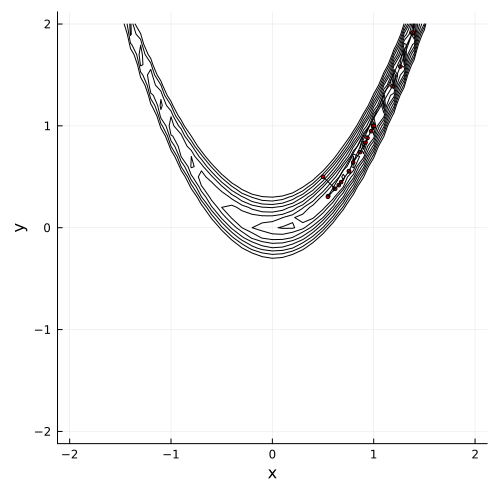

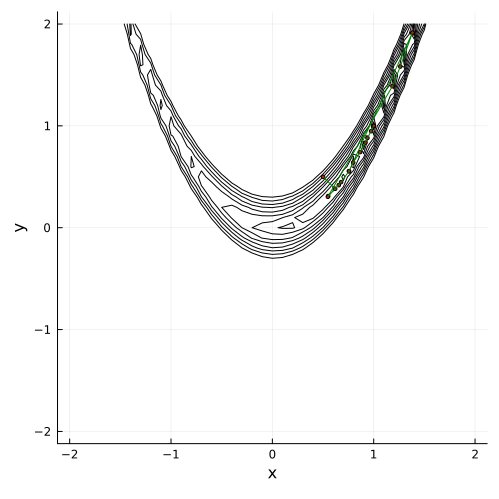

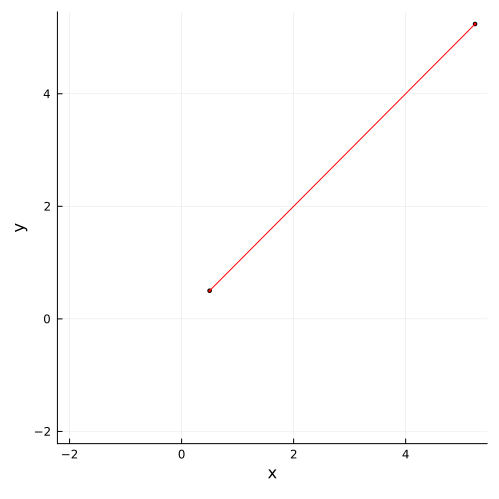

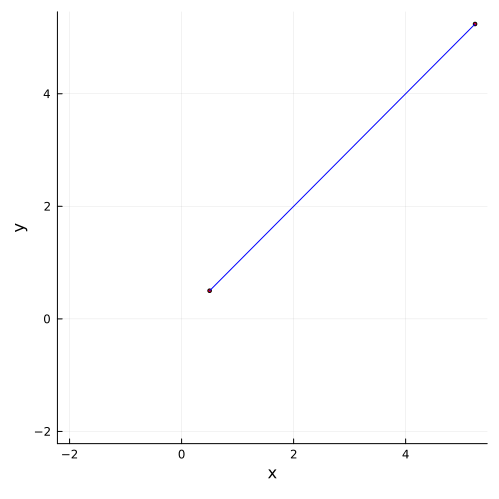

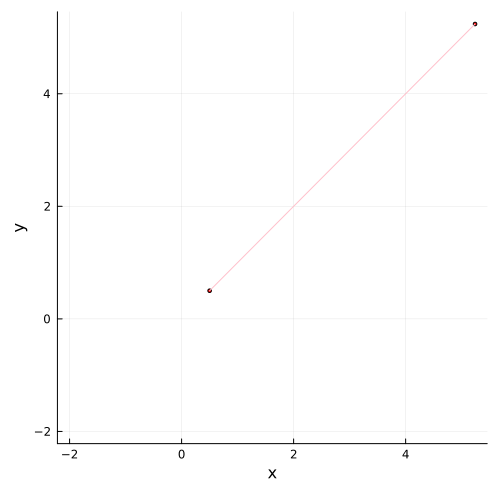

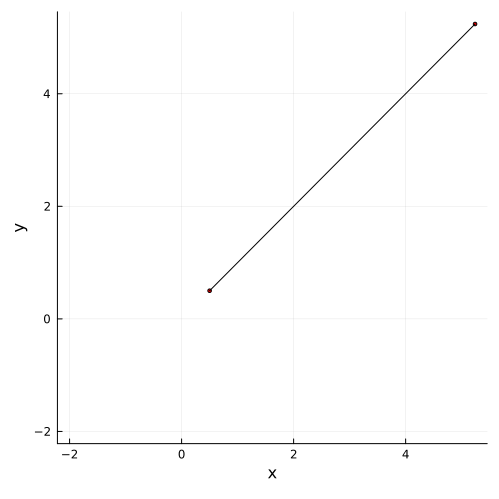

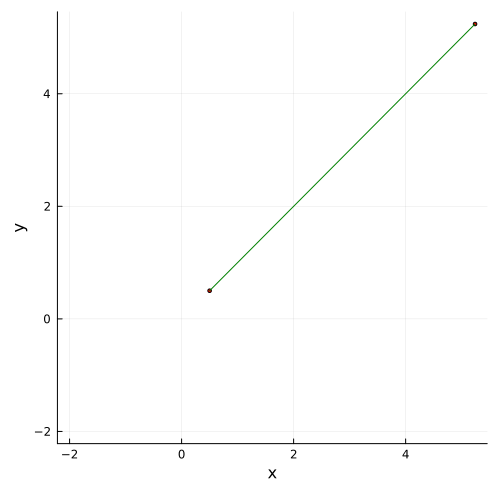

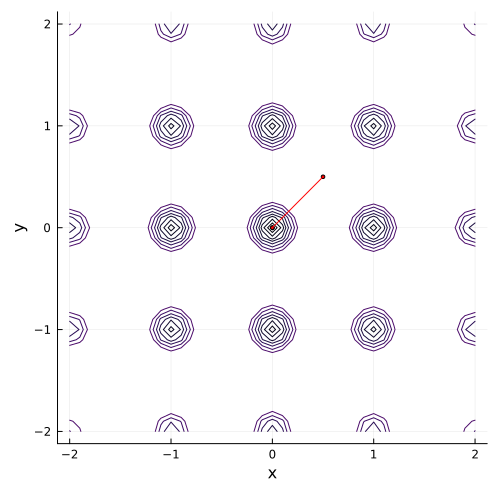

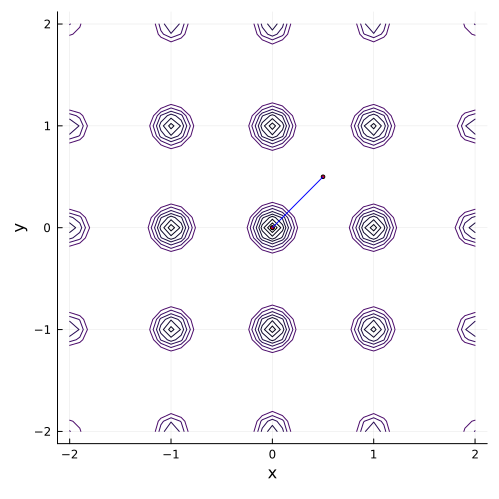

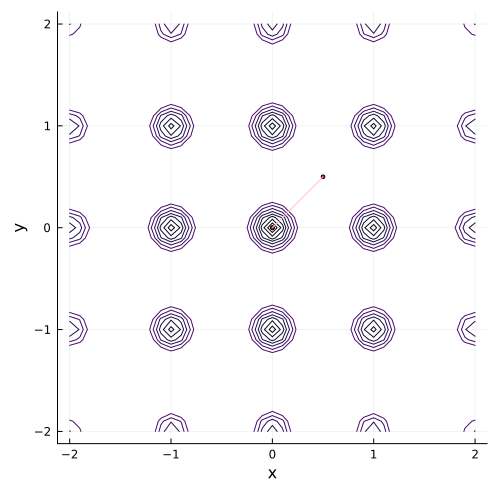

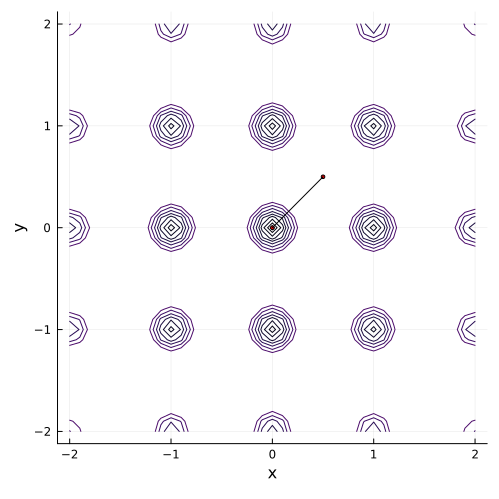

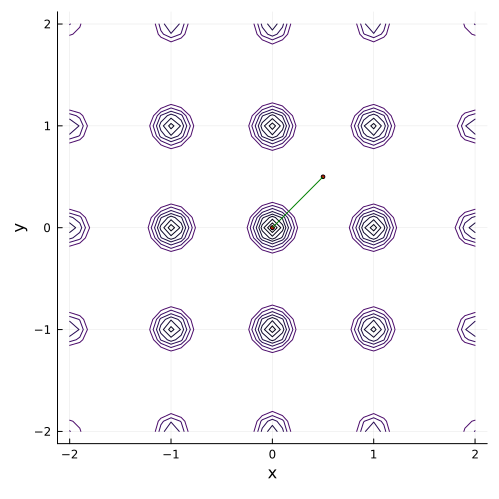

In [2]:
using LinearAlgebra
using Plots
using Dates

gr()

function df(f, x::Vector{Float64}, i, h=1e-5)
    x_plus = copy(x)
    x_minus = copy(x)
    
    x_plus[i] += h
    x_minus[i] -= h
    
    df_dx = (f(x_plus) - f(x_minus)) / (2h)
    
    return df_dx
end

function gradient(f, x::Vector{Float64})
    grad = []
    for i in 1:length(x)
        push!(grad, df(f, x, i))
    end
    return grad
end

function swann_method(f, x0, h=0.1)
    first = x0
    second = x0 + h
    if f(second) > f(first)
        h = -h
        first, second = second, second + h
    end
    last = second + h
    
    while f(last) < f(second)
        h *= 2
        first, second, last = second, last, last + h
    end

    if second > last
        first, second, last = last, second, first
    end

    return first, last
end

function golden_section_search(f, a, b, eps=1e-5)
    phi = (sqrt(5) - 1) / 2 
    x1 = b - phi * (b - a)
    x2 = a + phi * (b - a)
    
    while abs(b - a) > eps
        if f(x1) <= f(x2)
            b = x2
        else
            a = x1
        end
        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)
    end
    
    return (a + b) / 2
end


function conjugate_gradient(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, grad) / dot(prev_grad, prev_grad)
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function polak_rebier(f, x0)
    eps1 = 1e-6
    eps2 = 1e-10
    x = copy(x0)
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    max_iters = 1000
    iter = 0
    
    while iter < max_iters
        iter += 1
        prev_grad = copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || abs(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, (grad - prev_grad)) / dot(prev_grad, prev_grad)

        if beta < 0 || iter % length(x) == 0
            d = -grad
        else
            d = -grad + beta * d
        end

        prev_x = copy(x)
        push!(trajectory, x)
    end

    return x, trajectory
end
function hestens_stifel(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        prev_d = copy(d)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, (grad-prev_grad)) / dot(prev_d, (grad-prev_grad))
        d = -grad + beta * prev_d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function dai_yuan(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, (grad-prev_grad)) / dot(d, (grad-prev_grad))
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function dickson(f, x0)
    eps1, eps2 = 1e-6, 1e-10
    x = x0
    prev_x = copy(x)
    grad = gradient(f, x)
    d = -grad
    trajectory = [x]
    
    while true
        prev_grad=copy(grad)
        l, r = swann_method(alpha -> f(x + alpha * d), 1e-7)
        alpha = golden_section_search(alpha -> f(x + alpha * d), l, r)
        x += alpha * d
        grad = gradient(f, x)

        if norm(x - prev_x) < eps1 || norm(f(x) - f(prev_x)) < eps2
            break
        end

        beta = dot(grad, grad) / dot(d, prev_grad)
        d = -grad + beta * d
        prev_x = copy(x)
        push!(trajectory, x)
    end
    
    return x, trajectory
end

function quadratic(x; a=1.0, b=2.0)
    return a * (x[1])^2 + b * (x[2])^2
end

function rosenbrock(x)
    return (1 - x[1])^2 + 100 * (x[2] - x[1]^2)^2
end

function schwefel(x)
    return 418.9829 * 2 - (x[1] * sin(sqrt(abs(x[1]))) + x[2] * sin(sqrt(abs(x[2]))))
end

function rastrigin(x)
    return 20 + sum(x.^2 .- 10 * cos.(2 * π * x))
end

x0 = [0.5, 0.5]

x = -2:0.1:2
y = -2:0.1:2
levels = [i^2 * 0.1 for i in 1:10]

function optimize_and_plot(f, method, method_name, color)
    start_time = now()
    x_min, trajectory = method(f, x0)
    elapsed_time = now() - start_time
    
    x_coords = [point[1] for point in trajectory]
    y_coords = [point[2] for point in trajectory]
    
    contour(x, y, (x, y) -> f([x, y]), levels=levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
    scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label="")
    p = plot!(x_coords, y_coords, label="", line=color)
    
    println("Функция: $method_name")
    println("Точка минимума: $x_min")
    println("Кол-во итераций: $(length(trajectory)-1)")
    println("Время работы: $elapsed_time\n")
    
    display(p)
end

functions = [("Квадратичная", quadratic), 
             ("Розенброка", rosenbrock), 
             ("Швефеля", schwefel), 
             ("Растригина", rastrigin)]

methods = [("Сопряжённые градиенты", conjugate_gradient, :red), 
           ("Полак-Рибьер", polak_rebier, :blue), 
           ("Диксон", dickson, :pink), 
           ("Дайяна", dai_yuan, :black), 
           ("Хестенс-Стифель", hestens_stifel, :green)]

for (fname, f) in functions
    println("\n========== Функция $fname ==========\n")
    for (mname, method, color) in methods
        optimize_and_plot(f, method, mname, color)
    end
end